In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
# 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'

# file_path = '../datasets/.xlsx'
# pd.read_excel(file_path, header=2) 

# 1. 데이터 불러오기 및 가공


In [436]:
# GDP 데이터 불러오기
dfGDP = pd.read_excel(io='../datasets/GDP.xlsx', header=2)
# dfGDP.iloc[:2]
# dfGDP.loc[[1]]  # 인덱스가 1인 행
# dfGDP.loc[[1,3], '2017':] # 인덱스가 1 그리고 3이면서 2017 이후 컬럼만 나오게끔
dfGDP.loc[[1], '2017':]
# transxyGDP = dfGDP.transpose()
# dropIndColGDP = transxyGDP.drop(transxyGDP.index[0])
# dropIndColGDP
# usableColGDP = transxyGDP.iloc[1:]
# usableColGDP
# editedGDP = transxyGDP[['국내총생산(명목GDP)', '경제성장률(실질GDP성장률)']]
# editedGDP
cols_after_2017 = dfGDP.columns[dfGDP.columns >= '2017']
finalGDPWithoutTr = dfGDP.loc[[1], list(cols_after_2017)]
finalGDPWithTr = finalGDPWithoutTr.transpose()
new_columns = finalGDPWithTr.iloc[0]
GDP = finalGDPWithTr.drop(index=finalGDPWithTr.index[0])
GDP.columns = new_columns
GDP
# # 첫 번째 행을 인덱스로 설정
# GDP = GDP.set_index(GDP.index[0])

# # 데이터 타입 변환
# GDP = GDP.apply(pd.to_numeric, errors='coerce')

# # 플롯 생성
# GDP.plot(figsize=(10, 6))
# plt.show()


Unnamed: 0,경제성장률(실질GDP성장률)
2017,3.4
2018,3.2
2019,2.3
2020,-0.7
2021,4.6
2022,2.7


In [437]:
# 실업률 데이터 불러오기

dfEmployment = pd.read_excel(io='../datasets/EmploymentRate.xlsx', header=2)
# dfEmployment.loc[[5, 7]]  # 인덱스가 5,7 인 행들
# dfEmployment.loc[[5, 7], '2017':]
cols_after_2017 = dfEmployment.columns[dfEmployment.columns >= '2017']
finalEmploymentWithoutTr = dfEmployment.loc[[5,7], list(cols_after_2017)]
finalEmploymentWithTr = finalEmploymentWithoutTr.transpose()
new_columns = finalEmploymentWithTr.iloc[0]
Employment = finalEmploymentWithTr.drop(index=finalEmploymentWithTr.index[0])
Employment.columns = new_columns
Employment

Unnamed: 0,실업률(%),청년실업률(%)
2017,3.7,9.8
2018,3.8,9.5
2019,3.8,8.9
2020,4.0,9.0
2021,3.7,7.8
2022,2.9,6.4


In [438]:
# 정부 R&D 지출 데이터 불러오기
dfGovernmentRND = pd.read_excel(io='../datasets/GovernmentRND.xlsx', header=2)
# dfGovernmentRND.transpose()
# dfGovernmentRND
# dfGovernmentRND.iloc[:5]
# type(dfGovernmentRND.iloc[[1]]) # 1개의 행만 가지고 나온다고 해도 [[]]으로 하면 df로 나옴
# dfGovernmentRND.iloc[[1]]
# fGovernmentRND.loc[[1], '2017':]
cols_after_2017 = dfGovernmentRND.columns[dfGovernmentRND.columns >= '2017']
finalGovRNDWithoutTr = dfGovernmentRND.loc[[1], list(cols_after_2017)]
finalGovRNDWithTr = finalGovRNDWithoutTr.transpose()
new_columns = finalGovRNDWithTr.iloc[0]
GovRND = finalGovRNDWithTr.drop(index=finalGovRNDWithTr.index[0])
GovRND.columns = new_columns
GovRND

Unnamed: 0,"(최근5년간연평균증감률,%)"
2017,1.9
2018,1.1
2019,2.1
2020,6.1
2021,13.1
2022,8.7


In [439]:
# 민간기업 R&D 지출 데이터 불러오기, Transpose 사용해서 행과 열을 바꿈
dfPrivateRND = pd.read_excel(io='../datasets/PrivateRND.xlsx', header=2)
# dfPrivateRND.iloc[[2,4,6,8]]
#dfPrivateRND.loc[[2,4,6,8], '2017':]
# 오류 dfPrivateRND.loc[1, ['Unnamed: 0'] + list(dfPrivateRND.columns['2017':])]
# cols_after_2017 = dfPrivateRND.columns[dfPrivateRND.columns >= 2017]
# dfPrivateRND.loc[1, ['Unnamed: 0'] + list(cols_after_2017)] 오류
cols_after_2017 = dfPrivateRND.columns[dfPrivateRND.columns >= '2017']
finalPrivateRNDWithoutTr = dfPrivateRND.loc[[2,4,6,8], list(cols_after_2017)]
finalPrivateRNDWithTr = finalPrivateRNDWithoutTr.transpose()
new_columns = finalPrivateRNDWithTr.iloc[0]
PrivateRND = finalPrivateRNDWithTr.drop(index=finalPrivateRNDWithTr.index[0])
PrivateRND.columns = new_columns
PrivateRND

Unnamed: 0,"(대기업증감률,%)",(중견기업증감율),"(중소기업증감률,%)","(벤처기업증감률,%)"
2017,20.4,13.0,6.7,6.1
2018,10.1,5.8,6.9,18.6
2019,1.9,6.2,6.9,9.1
2020,1.1,1.8,-0.9,17.1
2021,8.8,10.7,7.4,15.2
2022,12.3,9.0,10.5,5.6


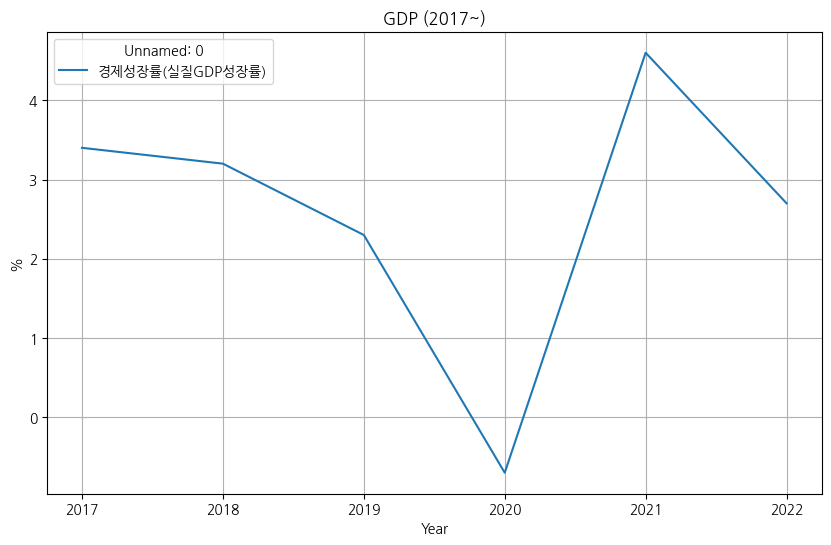

In [440]:
# GDP
# 컬럼명이 문자이고 데이터 타입이 object인 경우 다음과 같이 해결할 수 있습니다:

for col in GDP.columns:
    GDP[col] = pd.to_numeric(GDP[col], errors='coerce')

# 플롯 생성
GDP.plot(figsize=(10, 6), legend=True)
plt.title('GDP (2017~)')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.show()

# # 특정 컬럼만 플롯
# df[['column1', 'column2']].plot(figsize=(10, 6))
# plt.show()



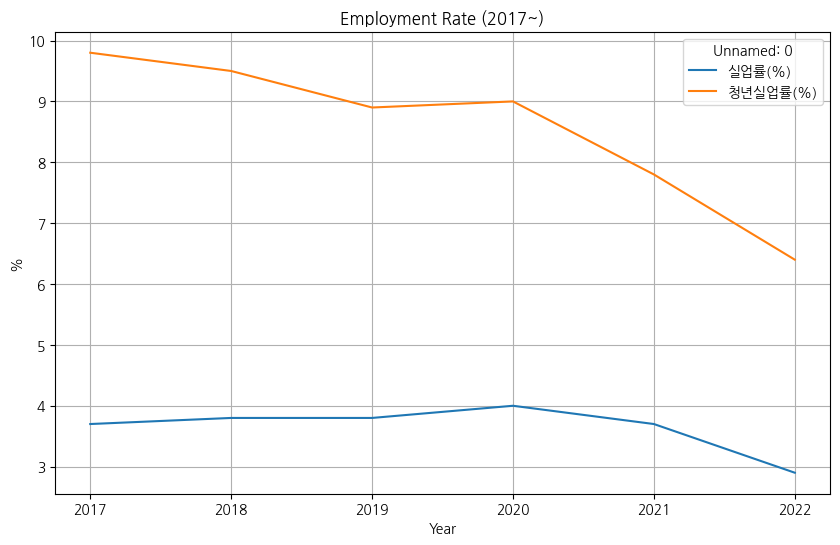

In [441]:
# Employment
# 컬럼명이 문자이고 데이터 타입이 object인 경우 다음과 같이 해결할 수 있습니다:

for col in Employment.columns:
    Employment[col] = pd.to_numeric(Employment[col], errors='coerce')

# 플롯 생성
Employment.plot(figsize=(10, 6), legend=True)
plt.title('Employment Rate (2017~)')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.show()

# # 특정 컬럼만 플롯
# df[['column1', 'column2']].plot(figsize=(10, 6))
# plt.show()

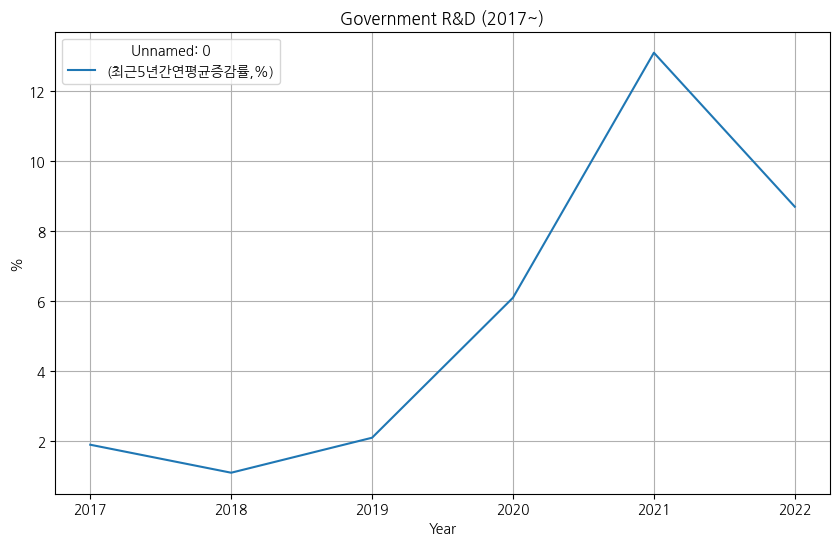

In [442]:
# Government RND
# 컬럼명이 문자이고 데이터 타입이 object인 경우 다음과 같이 해결할 수 있습니다:

for col in GovRND.columns:
    GovRND[col] = pd.to_numeric(GovRND[col], errors='coerce')

# 플롯 생성
GovRND.plot(figsize=(10, 6), legend=True)
plt.title('Government R&D (2017~)')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.show()

# # 특정 컬럼만 플롯
# df[['column1', 'column2']].plot(figsize=(10, 6))
# plt.show()

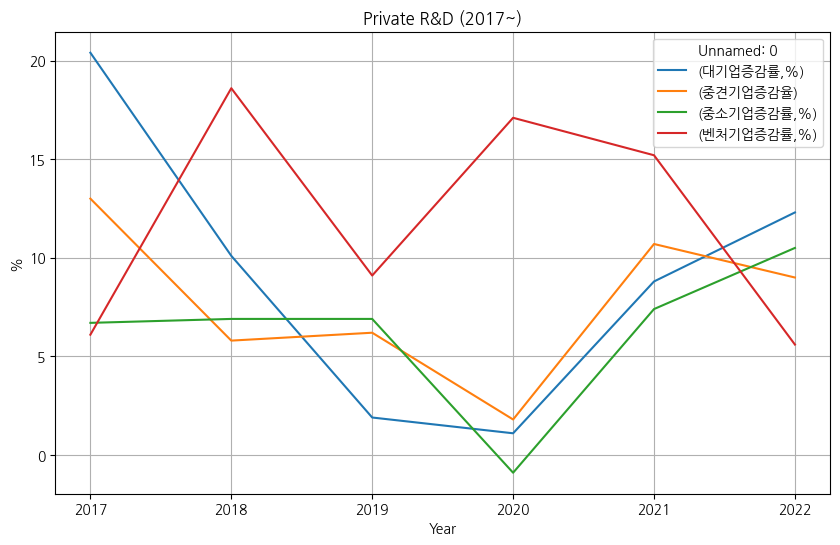

In [443]:
# Private RND
# 컬럼명이 문자이고 데이터 타입이 object인 경우 다음과 같이 해결할 수 있습니다:

for col in PrivateRND.columns:
    PrivateRND[col] = pd.to_numeric(PrivateRND[col], errors='coerce')

# 플롯 생성
PrivateRND.plot(figsize=(10, 6), legend=True)
plt.title('Private R&D (2017~)')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.show()

# # 특정 컬럼만 플롯
# df[['column1', 'column2']].plot(figsize=(10, 6))
# plt.show()

In [444]:
# plt.figure(figsize=(12, 6))

# GDP.plot(label='GDP Growth')
# Employment.plot(label='(Un)Employment')
# GovRND.plot(label='R&D by Gov')
# PrivateRND.plot(label='R&D by Pri')

# plt.title('Comparison GDP and Other Indicators')
# plt.xlabel('Year')
# plt.ylabel('%')
# plt.grid(True)
# plt.legend()
# plt.show()


<Figure size 1200x600 with 0 Axes>

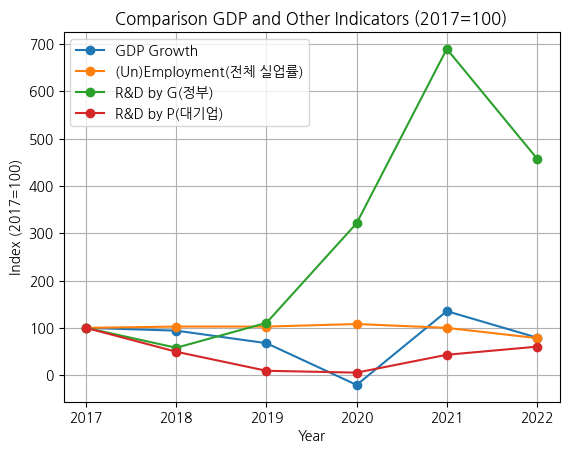

In [445]:
# 각 데이터프레임에서 필요한 시리즈 추출
gdp_series = GDP.iloc[:, 0]  
emp_series = Employment.iloc[:, 0] # 실업률 # 다른 컬럼에는 청년도 있으므로 추후 분석 가능
gov_rnd_series = GovRND.iloc[:, 0]
pri_rnd_series = PrivateRND.iloc[:, 0] # 대기업 # 다른 컬럼에는 중견, 중소, 벤처도 있으므로 추후 분석 가능

# 2017년을 100으로 하는 지수화 (첫해를 100으로 설정)
gdp_indexed = (gdp_series / gdp_series.iloc[0]) * 100
emp_indexed = (emp_series / emp_series.iloc[0]) * 100
gov_rnd_indexed = (gov_rnd_series / gov_rnd_series.iloc[0]) * 100
pri_rnd_indexed = (pri_rnd_series / pri_rnd_series.iloc[0]) * 100

# 지수화된 시리즈들을 하나의 데이터프레임으로 결합
indexed_df = pd.DataFrame({
    'GDP Growth': gdp_indexed,
    '(Un)Employment(전체 실업률)': emp_indexed,
    'R&D by G(정부)': gov_rnd_indexed,
    'R&D by P(대기업)': pri_rnd_indexed
})

# 그래프 그리기
plt.figure(figsize=(12, 6))
indexed_df.plot(marker='o')  # 마커 추가

plt.title('Comparison GDP and Other Indicators (2017=100)')
plt.xlabel('Year')
plt.ylabel('Index (2017=100)')
plt.grid(True)
plt.legend()
plt.show()

